<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/MoDesc_soccer_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade:** Medidas de proximidade

**Grupo 3:**
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano de Albuquerque*
* *Yaci Mair da Silva Ribeiro*


**Descrição**

O dataset em questão possui coordenadas das posições de jogadores e dos centros de cada lado  em um campo de futebol. Através da métrica da distância **Euclidiana**, serão agrupados jogadores que pertencem ao mesmo time, supondo como condição inicial que o jogo ainda não se iniciou e que os jogadores ainda estão do seu lado do campo (ou seja, jogadores de um mesmo time estarão mais próximos do seu centro de campo).

# Configurações iniciais

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2001/dados/players_match.csv')
df

,Unnamed: 0,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y
0,0,8.107316,13.362118,25.0,50.0,75,50
1,1,48.687401,80.312717,25.0,50.0,75,50
2,2,31.740322,64.865129,25.0,NaN,75,50
3,3,13.652919,81.462626,25.0,50.0,75,50
4,4,19.134233,28.985857,25.0,50.0,75,50
5,5,16.793206,97.194354,NaN,50.0,75,50
6,6,18.269684,56.269861,25.0,50.0,75,50
7,7,14.532925,18.316240,25.0,50.0,75,50
8,8,16.813938,78.656237,25.0,50.0,75,50
9,9,37.347460,2.736767,25.0,50.0,75,50


1. preencher os valores NaN da coluna 'Center_Side_A_X' com valor de 25.0;
2. preencher os valores NaN da coluna 'Center_Side_A_Y' com valor de 50.0;

'Dropando' a coluna 'Unnamed: 0'

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player_Position_X  22 non-null     float64
 1   Player_Position_Y  22 non-null     float64
 2   Center_Side_A_X    25 non-null     float64
 3   Center_Side_A_Y    24 non-null     float64
 4   Center_Side_B_X    27 non-null     int64  
 5   Center_Side_B_Y    27 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.4 KB


Convertendo valores para numéricos

In [ ]:
# Convertendo as colunas para valores numéricos
df['Player_Position_X'] = pd.to_numeric(df['Player_Position_X'], errors='coerce')
df['Player_Position_Y'] = pd.to_numeric(df['Player_Position_Y'], errors='coerce')
df['Center_Side_A_X'] = pd.to_numeric(df['Center_Side_A_X'], errors='coerce')
df['Center_Side_A_Y'] = pd.to_numeric(df['Center_Side_A_Y'], errors='coerce')
df['Center_Side_B_X'] = pd.to_numeric(df['Center_Side_B_X'], errors='coerce')
df['Center_Side_B_Y'] = pd.to_numeric(df['Center_Side_B_Y'], errors='coerce')

Dropando e substituindo valores nulos

In [ ]:
df.dropna(subset=['Player_Position_X', 'Player_Position_Y'], inplace=True)

df['Center_Side_A_X'].fillna(25.0, inplace=True)
df['Center_Side_A_Y'].fillna(50.0, inplace=True)

# Cálculo de distância dos jogadores

Scatterplot das posições dos jogadores e dos centros do campo

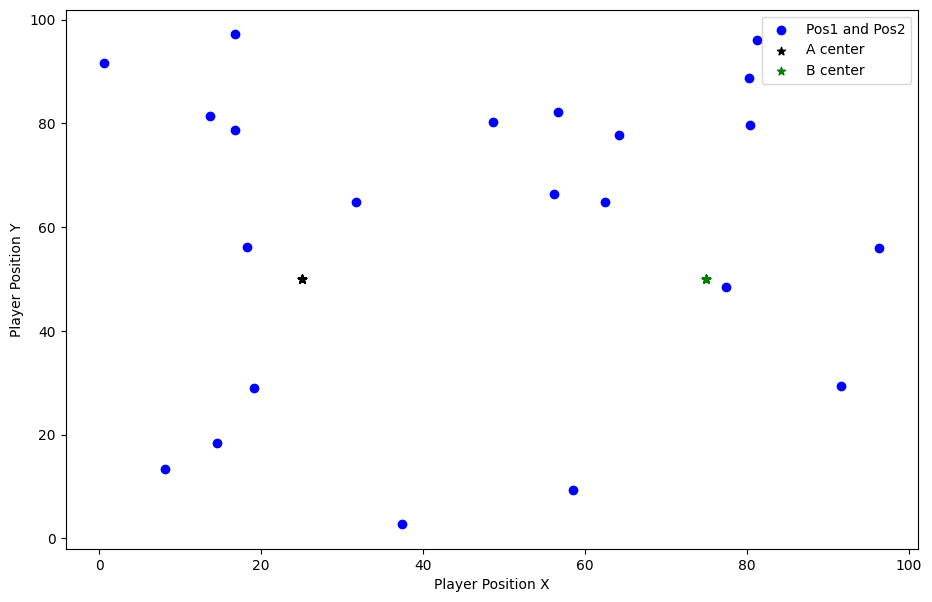

In [ ]:
# Colunas de interesse
pos1 = df['Player_Position_X']
pos2 = df['Player_Position_Y']
center_ax = df['Center_Side_A_X']
center_ay = df['Center_Side_A_Y']
center_bx = df['Center_Side_B_X']
center_by = df['Center_Side_B_Y']

plt.figure(figsize=(11, 7))
plt.scatter(pos1, pos2, color='b', label='Pos1 and Pos2')  # Posições dos jogadores
plt.scatter(center_ax, center_ay, color='black', marker='*', label='A center')  # Centro A
plt.scatter(center_bx, center_by, color='green', marker='*', label='B center')  # Centro B
plt.xlabel('Player Position X')
plt.ylabel('Player Position Y')

plt.legend()
plt.show()

Calculando a distância dos jogadores aos centros do campo pelo método da **distância euclidiana**, que é o comprimento do segmento de reta que conecta dois pontos distintos.

In [ ]:
# Extrair as coordenadas dos jogadores e dos centros dos lados A e B em numpy arrays
player_positions = df[['Player_Position_X', 'Player_Position_Y']].values
center_side_a = df[['Center_Side_A_X', 'Center_Side_A_Y']].values
center_side_b = df[['Center_Side_B_X', 'Center_Side_B_Y']].values

# Calcular a distância euclidiana entre cada jogador e o centro do lado A
distances_to_center_a = np.linalg.norm(player_positions - center_side_a, axis=1)

# Calcular a distância euclidiana entre cada jogador e o centro do lado B
distances_to_center_b = np.linalg.norm(player_positions - center_side_b, axis=1)

# Adicionar as distâncias calculadas como colunas ao 'df'
df['Distance_To_Center_A'] = distances_to_center_a
df['Distance_To_Center_B'] = distances_to_center_b

A estratégia é supor que jogadores do mesmo time estão de um mesmo lado do campo e, portanto, mais próximos do centro A (jogadores em azul) ou do centro B (jogadores em vermelho).

In [ ]:
# Comparar as duas colunas e atribuir 0 ou 1 na coluna 'time' com base condição
df['time'] = np.where(df['Distance_To_Center_A'] > df['Distance_To_Center_B'], 0, 1)

In [ ]:
df

,Player_Position_X,Player_Position_Y,Center_Side_A_X,Center_Side_A_Y,Center_Side_B_X,Center_Side_B_Y,Distance_To_Center_A,Distance_To_Center_B,time
0,8.107316,13.362118,25.0,50.0,75,50,40.344729,76.269034,1
1,48.687401,80.312717,25.0,50.0,75,50,38.470167,40.139927,1
2,31.740322,64.865129,25.0,50.0,75,50,16.321887,45.742451,1
3,13.652919,81.462626,25.0,50.0,75,50,33.446271,68.944624,1
4,19.134233,28.985857,25.0,50.0,75,50,21.817457,59.687337,1
5,16.793206,97.194354,25.0,50.0,75,50,47.902594,74.935559,1
6,18.269684,56.269861,25.0,50.0,75,50,9.198278,57.075738,1
7,14.532925,18.316240,25.0,50.0,75,50,33.367953,68.265129,1
8,16.813938,78.656237,25.0,50.0,75,50,29.802542,64.859832,1
9,37.347460,2.736767,25.0,50.0,75,50,48.849492,60.427865,1


Scatterplot dos jogadores mais próximos a cada um dos centros do campo

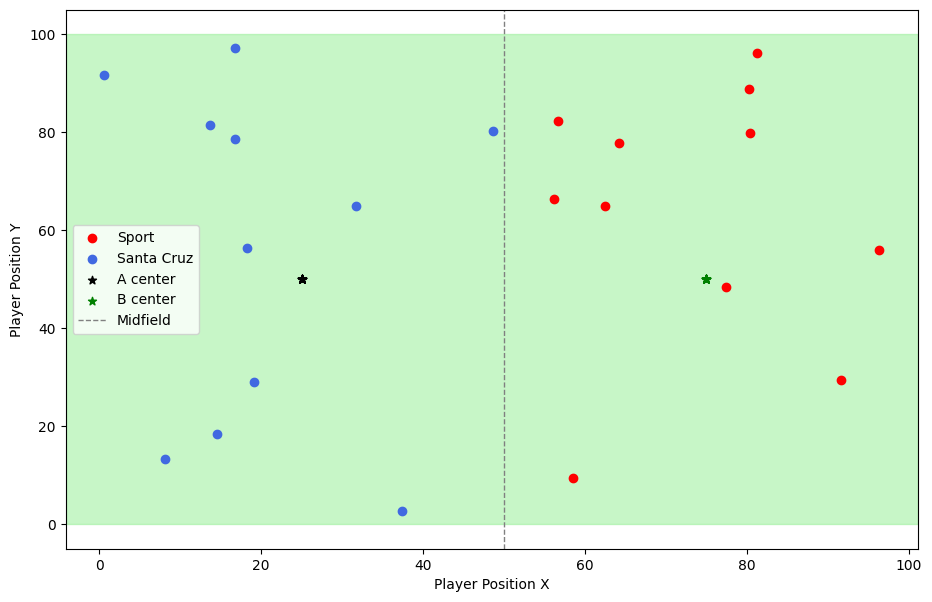

In [ ]:
# Dividir o DataFrame em dois com base na coluna 'time'
time_0 = df[df['time'] == 0]
time_1 = df[df['time'] == 1]

plt.figure(figsize=(11, 7))

# Defina a cor de fundo como verde suave (pode ajustar o valor de alpha para controlar a transparência)
plt.axhspan(ymin=0, ymax=100, color='lightgreen', alpha=0.5)

# Plotar os pontos vermelhos para 'time' igual a 0
plt.scatter(time_0['Player_Position_X'], time_0['Player_Position_Y'], c='red', label='Sport')

# Plotar os pontos azuis para 'time' igual a 1
plt.scatter(time_1['Player_Position_X'], time_1['Player_Position_Y'], c='royalblue', label='Santa Cruz')

# Plotando os centros A e B do campo
plt.scatter(df['Center_Side_A_X'], df['Center_Side_A_Y'], c='black', marker='*', label='A center')
plt.scatter(df['Center_Side_B_X'], df['Center_Side_B_Y'], c='green', marker='*', label='B center')

# Adicionar uma linha vertical na posição x=50
plt.axvline(x=50, color='gray', linestyle='dashed', linewidth=1, label='Midfield')

plt.xlabel('Player Position X')
plt.ylabel('Player Position Y')
plt.legend()
plt.title('')
plt.show()